<a href="https://colab.research.google.com/github/tmquan11032003/Machine_Learning/blob/main/FMCGStore_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [403]:
# data manipulation
import numpy as np
import pandas as pd
from scipy.stats import (chi2_contingency, randint,
                         expon, gamma, uniform, loguniform)
from scipy.cluster.hierarchy import dendrogram #Clustering
import scipy.cluster.hierarchy as shc #Clustering

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

# data processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder,
                                   MinMaxScaler, StandardScaler,
                                   LabelEncoder)
from sklearn.compose import ColumnTransformer

# imblanced dataset
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler
from imblearn.combine import SMOTEENN

# binary classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize #Clustering

# modelling
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier,ExtraTreesClassifier)
from sklearn.tree import (DecisionTreeClassifier, ExtraTreeClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans #Clustering


# Principal component ânlysis
from sklearn.decomposition import PCA #Clustering


# display images
import graphviz

# metrics
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import silhouette_score #Clustering
#Debug lỗi không import được xgboost
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier #!pip install xgboost

In [417]:
file_url = 'https://drive.google.com/file/d/1cRNvH7NAdSxIDA5g5uKjtXMEJZ08F1NX/view'
file_id = file_url.split('/')[-2]
url = 'https://drive.google.com/uc?id=' + file_id

print(file_id)
print(url)

df = pd.read_csv(url)

1cRNvH7NAdSxIDA5g5uKjtXMEJZ08F1NX
https://drive.google.com/uc?id=1cRNvH7NAdSxIDA5g5uKjtXMEJZ08F1NX


# A. Data Dictionary

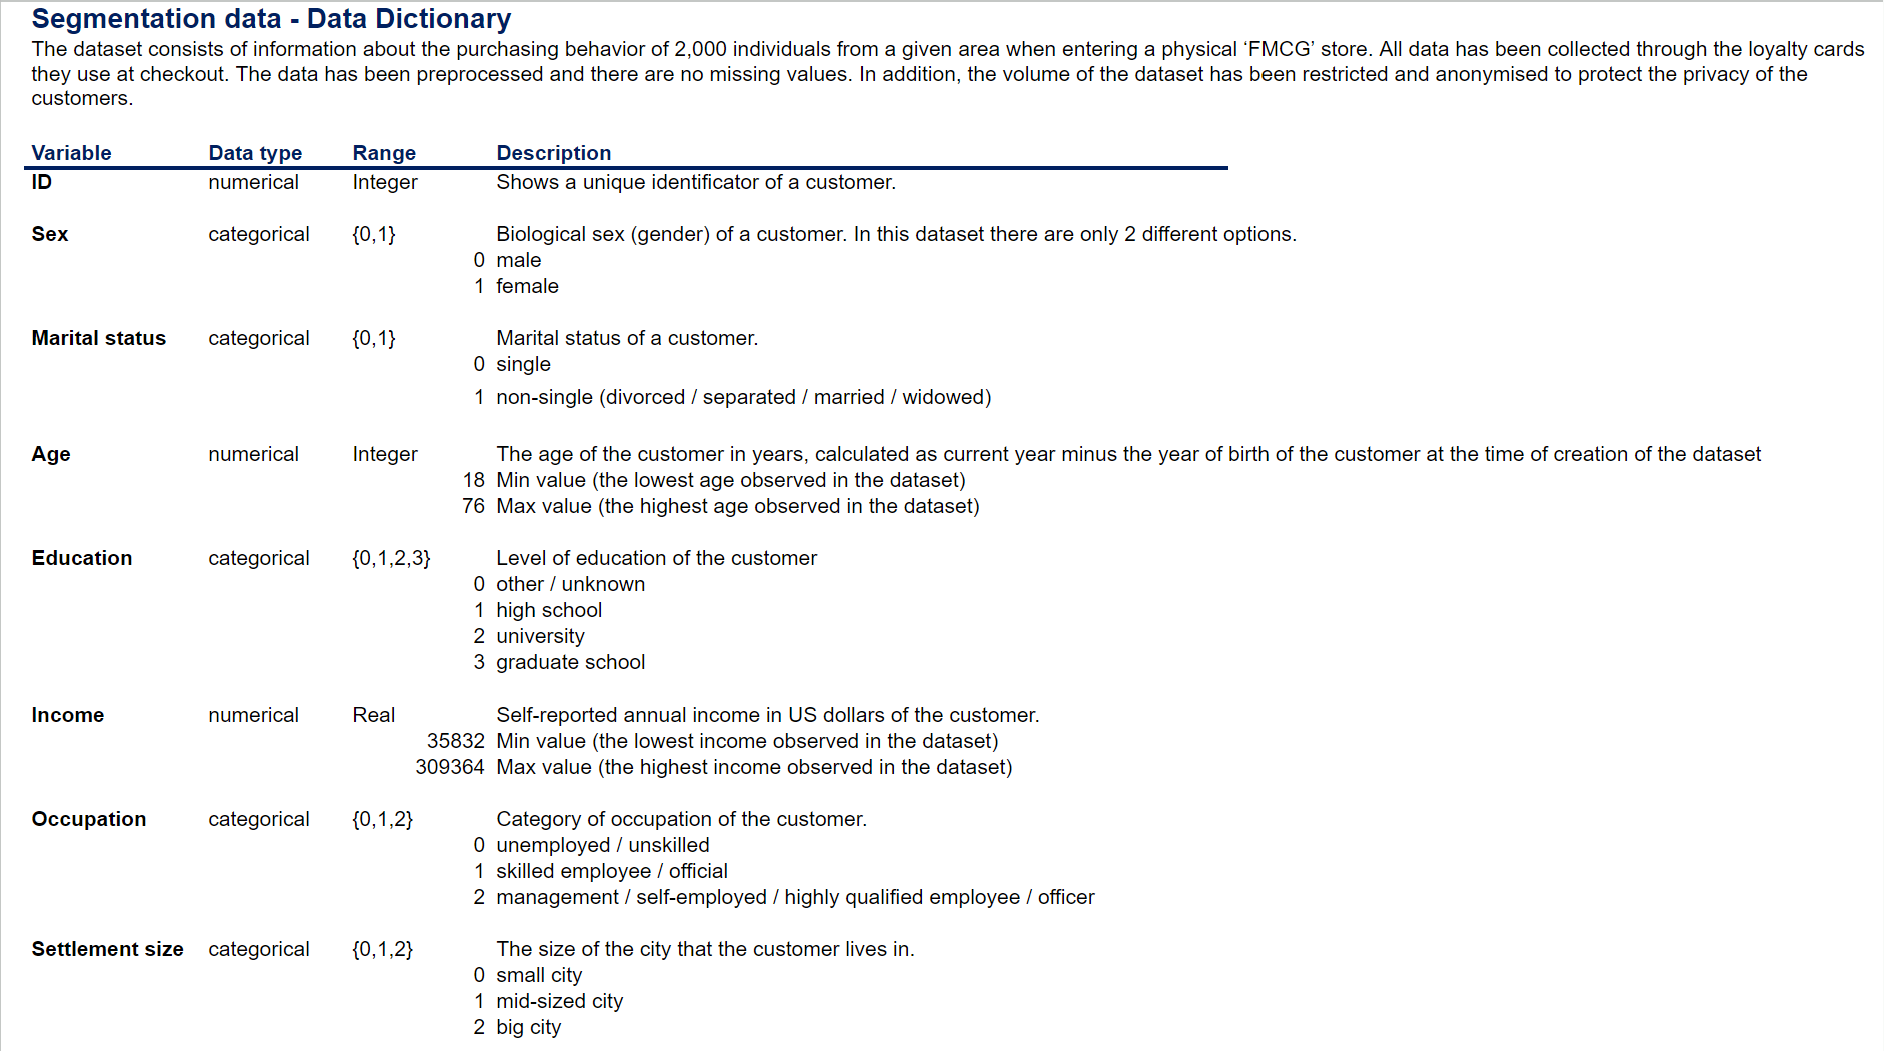

# B. Preview Data

In [418]:
df = df.reset_index(drop = True).set_index(df.index + 1)

In [419]:
df.drop(columns = 'ID',inplace = True)

In [420]:
df.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,0,0,67,2,124670,1,2
2,1,1,22,1,150773,1,2
3,0,0,49,1,89210,0,0


In [421]:
df.tail(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1998,0,0,31,0,86400,0,0
1999,1,1,24,1,97968,0,0
2000,0,0,25,0,68416,0,0


In [422]:
df.sample(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1577,1,1,67,3,128343,0,0
185,0,0,36,1,106205,1,1
1688,1,0,50,1,112204,0,0


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [424]:
#Convert Columns to categorycal
cat_cols = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
def convert_cat(df, cat_cols):
  for cat_col in cat_cols:
    df[cat_col] = df[cat_col].astype('category')
convert_cat(df, cat_cols)

In [425]:
# data distribution
print('Numeric')
display(df.describe())  # numerical data

print('Categorical')
display(df.describe(exclude = [int, float]))  # categorical data

Numeric


,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


Categorical


,Sex,Marital status,Education,Occupation,Settlement size
count,2000,2000,2000,2000,2000
unique,2,2,4,3,3
top,0,0,1,1,0
freq,1086,1007,1386,1113,989


# 1. Exploratory Data Analysis (EDA)

In [479]:
# Set new style for the graph
plt.style.use("default")

<ipython-input-480-3cd339c99e47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']);


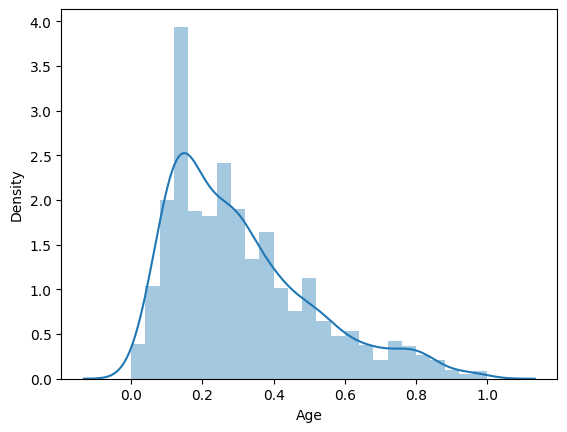

In [480]:
sns.distplot(df['Age']);

<ipython-input-481-026561f384e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income']);


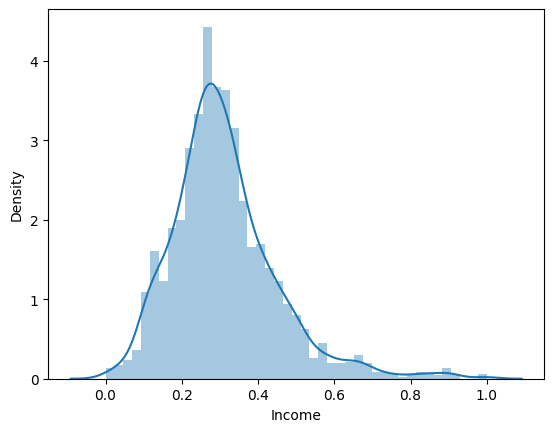

In [481]:
sns.distplot(df['Income']);

# 2. Data Wrangling

In [482]:
scaler = MinMaxScaler()
scale_df = scaler.fit_transform(df)
df = pd.DataFrame(data=scale_df, columns=df.columns, index=df.index)

In [483]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
1,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,0.166667
2,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,0.833333
3,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,0.500000
4,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,0.166667
5,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,0.166667


In [484]:
# #Scale
# Numerical_cols = df.select_dtypes(include=['int']) #Choose numerical data
# scaler = MinMaxScaler() #Scale by MinMaxScaler
# df[Numerical_cols.columns] = scaler.fit_transform(df[Numerical_cols.columns])


In [485]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
1,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,0.166667
2,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,0.833333
3,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,0.500000
4,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,0.166667
5,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,0.166667


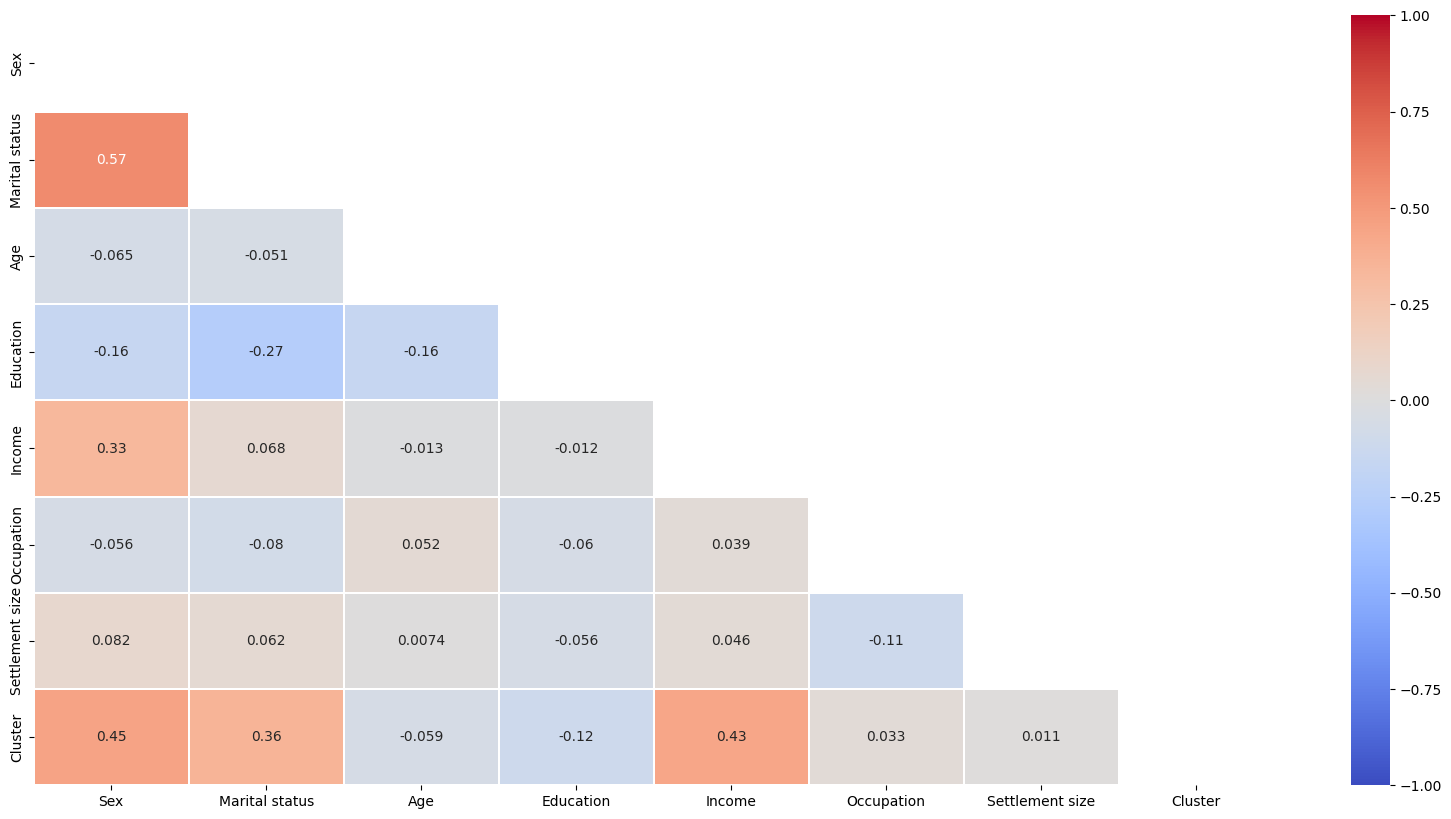

In [486]:
#Vẽ hình ma trận tương quan (correlation matrix) để xem tương quan giữa các biến
plt.figure(figsize=(20, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# 3. Pricipal component analysis

In [487]:
# Principal component analysis
from sklearn.decomposition import PCA #Clustering
pca = PCA()
X_pca = pca.fit_transform(df)

In [488]:
X_pca

array([[ 8.28860371e-01,  2.62446977e-01, -3.40423703e-01, ...,
         4.29256037e-01, -1.25426263e-01, -6.12910272e-02],
       [-5.35796099e-01,  8.19697926e-01,  8.09672658e-02, ...,
         2.09406494e-01,  8.60776008e-02,  6.83709408e-02],
       [ 4.86812123e-01, -6.08364344e-01,  3.85215327e-01, ...,
         1.02949472e-01,  3.54216524e-04, -7.82480974e-02],
       ...,
       [ 4.95912674e-01, -6.59826199e-01,  4.17175727e-01, ...,
         1.12363636e-02,  6.43318430e-02, -9.69004241e-02],
       [-8.67071868e-01, -4.13350879e-01, -2.01393474e-01, ...,
         1.53025665e-01,  5.36133269e-02,  6.11425280e-02],
       [ 4.84169664e-01, -6.73663385e-01,  4.33399986e-01, ...,
         6.15555816e-03, -2.45385012e-03, -4.26281408e-02]])

In [489]:
# how much info we reteained from the dataset
pca.explained_variance_ratio_.cumsum()[1]

0.6632035419236187

# 4. Unsupervised Learnung

## a. Silhouette coefficients

In [490]:
si = []
for k in range(2, 11,1):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(df)
 score = silhouette_score(df, kmeans.labels_)
 si.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [491]:
si

[0.3579291358012762,
 0.3990745680501405,
 0.4269580263491803,
 0.45975630391694094,
 0.49439250483602104,
 0.5169873209027641,
 0.4898437764353565,
 0.4626780475598679,
 0.45354984739407606]

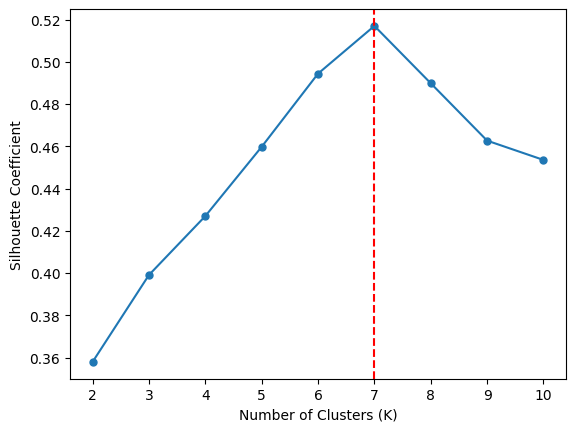

In [492]:
#Trực quan hoá Silhoutte coefficients
plt.plot(range(2, 11), si,'.-',markersize=10)
plt.xticks(range(2, 11))
plt.axvline(x=7, color='r', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Coefficient")
plt.show()

## b. Elbow


In [493]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_/1000)

In [494]:
wcss

[1.254931464825654,
 0.9200769373520534,
 0.6785423428525177,
 0.549176798310579,
 0.43210678715329004,
 0.36310900912513266,
 0.32969488837952066,
 0.30391312511965474,
 0.2786916483361208]

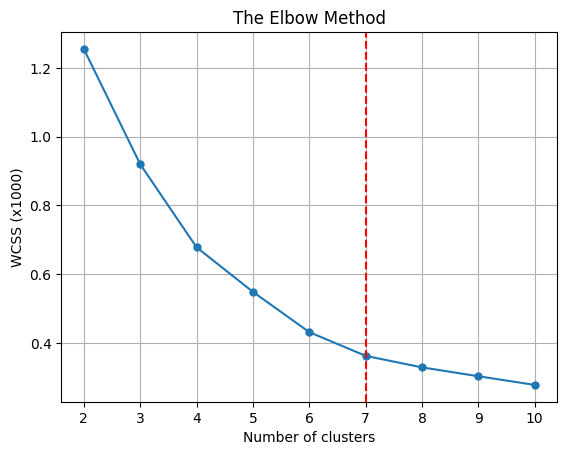

In [495]:
#Trực quan hoá Elbow
plt.plot(range(2, 11), wcss,'.-',markersize=10)
plt.xticks(range(2, 11))
plt.axvline(x=7, color='r', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (x1000)')
plt.grid(linestyle='-')
plt.show()

Kết hợp giữa 2 kết quả trên ta có k = 7 sẽ tối ưu mô hình nhất


# 4. K - Means Clustering

In [496]:
#Gán biến cho model và train
kmeans = KMeans(n_clusters = 7)
y_pred = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [497]:
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [498]:
#Add thêm cột class vào bảng data
df['Cluster']=y_pred

In [499]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
1,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,3
2,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,1
3,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,0
4,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,3
5,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,3


In [500]:
df['Cluster'].value_counts().to_frame().sort_index()

,Cluster
0,313
1,306
2,430
3,516
4,102
5,178
6,155


<Axes: xlabel='Cluster', ylabel='count'>

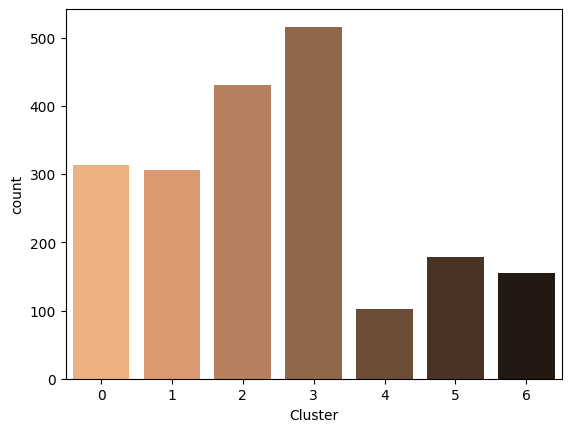

In [501]:
sns.countplot(data=df, x='Cluster', palette='copper_r')

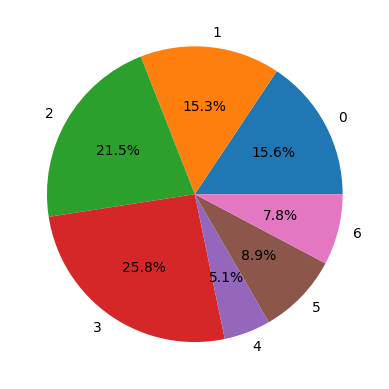

In [502]:
 #Phần trăm số lượng của các Cluster
plt.pie(df['Cluster'].value_counts().sort_index(), autopct='%1.1f%%', labels=['0', '1','2', '3','4','5','6'])
plt.show()

<Axes: xlabel='Cluster', ylabel='Income'>

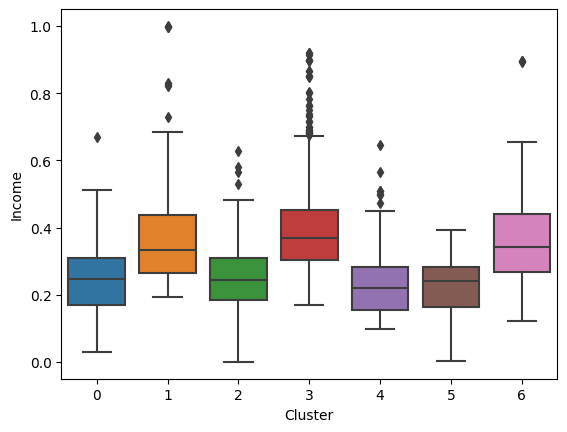

In [503]:
sns.boxplot(y = df.Income, x = df.Cluster)

<Axes: xlabel='Cluster', ylabel='Age'>

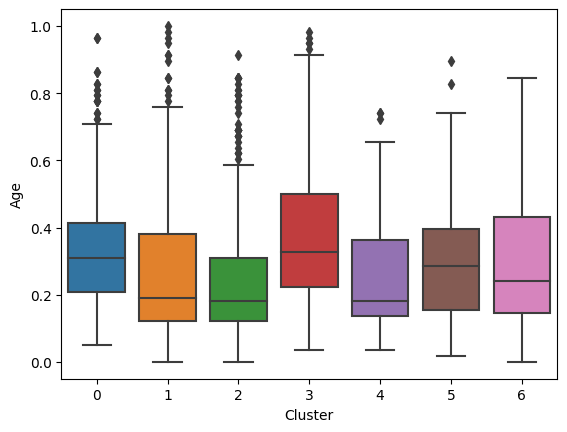

In [504]:
sns.boxplot(y = df.Age, x = df.Cluster)